# ============================================================================
# Innovation Diffusion Analysis - Bass Model Implementation
# ============================================================================

 
This notebook implements the Bass Diffusion Model to analyze the projected diffusion patterns of the Tecno Pocket Go, an innovative AR gaming device selected from TIME Magazine's Best Inventions of 2024 list.

# PROJECT OVERVIEW:

1. Selected Innovation: Tecno Pocket Go - a revolutionary handheld AR gaming system featuring a controller-based Windows 11 PC paired with AR glasses that creates an immersive 215-inch virtual display experience.
2. Look-Alike Innovation: Augmented Reality (AR) B2C Market - chosen as a historical proxy due to technological similarities, market positioning,and comparable adoption patterns in the immersive technology sector.
3. Data Source: Time series data of AR B2C market revenue worldwide (2017-2029) obtained from Statista, representing market adoption patterns for AR technologies in the consumer market.
4. Analysis Approach: The notebook implements comprehensive data preprocessing, Bass Model parameter estimation, model validation, and future diffusion forecasting to predict the adoption trajectory of the Tecno Pocket Go.

# METHODOLOGY:
- Data preprocessing and cleaning of AR market revenue data
- Bass Diffusion Model parameter estimation using non-linear least squares
- Generation of adoption forecasts
- Export of results for integration into written analysis report
# ============================================================================


In [192]:
#Importing the necessary libraries

import pandas as pd 
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data importing and Preprocessing

In [194]:
file_path = '/Users/arpinejanunts/Documents/Homework/HW1/data/AR_Revenue_Dataset.xlsx'

data = pd.read_excel(file_path, sheet_name='Data', skiprows=5, header=None)

data = data.drop(data.columns[0], axis=1)

data.columns = ['Year', 'Amount']

In [195]:
#Initial data preprocessing to ensure we work with numeric values 

data['Year'] = data['Year'].astype(int)
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')

#Since the revenue amount is present in billions, let's convert them here as well

data['Amount'] = data['Amount'] * 1000000000

#Since the revenue amounts starting from 2026 are predictions, we will focus only on the data from 2017 to 2025.

data = data.iloc[:9, :]

print(data)

   Year        Amount
0  2017  6.500000e+09
1  2018  7.400000e+09
2  2019  8.700000e+09
3  2020  1.090000e+10
4  2021  1.310000e+10
5  2022  1.550000e+10
6  2023  1.880000e+10
7  2024  2.450000e+10
8  2025  2.840000e+10


In [196]:
#Let's assume the Market Size(M) is the maximum revenue amount available in our data 

M = data['Amount'].max()

# Exploratory Data Visualization

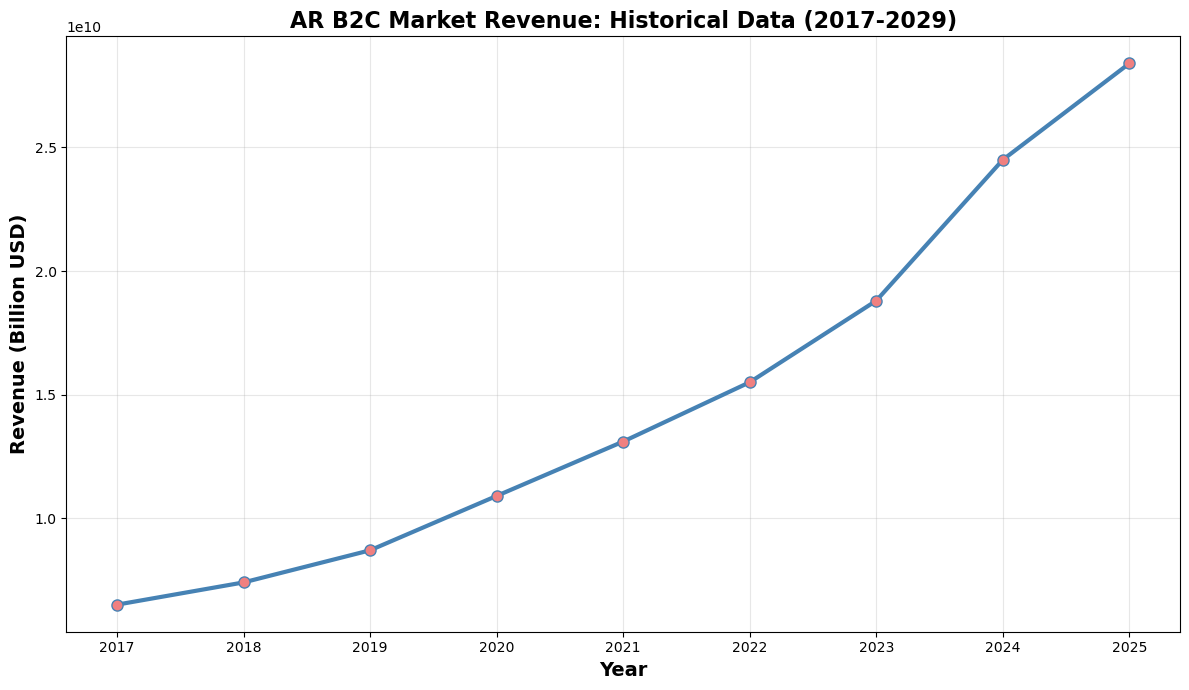

In [218]:
# Plotting the original data, to understand the historical revenue trends

plt.figure(figsize=(12, 7))
plt.plot(data['Year'], data['Amount'], 'o-', linewidth=3, markersize=8, 
         color='steelblue', markerfacecolor='lightcoral')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Revenue (Billion USD)', fontsize=14, fontweight='bold')
plt.title('AR B2C Market Revenue: Historical Data (2017-2029)', 
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

file_path_img1 = '/Users/arpinejanunts/Documents/Homework/HW1/img/historical_data_plot.png'

plt.savefig(file_path_img1, dpi=300, bbox_inches='tight')

plt.show()

In [198]:
def bass_cumulative(t, p, q, M):
    """
    Bass Model cumulative adoption function
    
    Parameters:
    - t (array): time periods (starting from 0)
    - p (float): coefficient of innovation 
    - q (float): coefficient of imitation
    - M (float): market potential
    
    Returns:
    - array: cumulative adoption values
    """
    return M * (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

In [199]:
def bass_period_adoption(t, p, q, M):
    """
    Bass Model period adoption function (new adopters per period)
    
    Parameters:
    - t (array): time periods (starting from 0)
    - p (float): coefficient of innovation
    - q (float): coefficient of imitation  
    - M (float): market potential
    
    Returns:
    - array: period adoption values
    """
    return M * ((p + q)**2 / p) * np.exp(-(p + q) * t) / (1 + (q/p) * np.exp(-(p + q) * t))**2

# Data Preparation for Parameter Estimation

Prepare the data for curve fitting:
- Create time index starting from 0
- Extract arrays for optimization

In [200]:
data['t'] = data['Year'] - data['Year'].min()

t_data = data['t'].values
y_data = data['Amount'].values

print("Data prepared for parameter estimation:")
print("Time periods (t):", t_data)
print("Revenue values:", y_data)

Data prepared for parameter estimation:
Time periods (t): [0 1 2 3 4 5 6 7 8]
Revenue values: [6.50e+09 7.40e+09 8.70e+09 1.09e+10 1.31e+10 1.55e+10 1.88e+10 2.45e+10
 2.84e+10]


# Bass Model Parameter Estimation

Estimate Bass Model parameters (p, q, M) using non-linear least squares

In [204]:
# Initial parameter guesses
# p: ranges from 0.001 to 0.1 
# q: ranegs from 0.1 to 0.5
# M: should be larger than maximum observed value
initial_guess = [0.1, 0.4, y_data.max() * 1.5]

#Setting bounds to avoid negative values 
lower_bounds = [0.0001, 0.01, 0]  
upper_bounds = [1, 1, M*2] 

print("Initial parameter guesses:")
print(f"p (innovation): {initial_guess[0]}")
print(f"q (imitation): {initial_guess[1]}")  
print(f"M (market potential): {initial_guess[2]}")

# Perform curve fitting
try:
    params, covariance = curve_fit(bass_cumulative, t_data, y_data, 
                                 p0=initial_guess, bounds = (lower_bounds, upper_bounds))
    p_est, q_est, M_est = params
    
    print("\n" + "="*50)
    print("BASS MODEL PARAMETER ESTIMATION RESULTS")
    print("="*50)
    print(f"Coefficient of Innovation (p): {p_est:.6f}")
    print(f"Coefficient of Imitation (q):  {q_est:.6f}")
    print(f"Market Potential (M):          {M_est:.2f} Billion USD")
    print(f"q/p Ratio:                     {q_est/p_est:.2f}")
    print("="*50)
    
    # Calculate parameter standard errors from covariance matrix
    param_errors = np.sqrt(np.diag(covariance))
    print(f"\nParameter Standard Errors:")
    print(f"p error: ±{param_errors[0]:.6f}")
    print(f"q error: ±{param_errors[1]:.6f}")
    print(f"M error: ±{param_errors[2]:.2f}")
    
except Exception as e:
    print(f"Parameter estimation failed: {e}")


Initial parameter guesses:
p (innovation): 0.1
q (imitation): 0.4
M (market potential): 42600000000.0

BASS MODEL PARAMETER ESTIMATION RESULTS
Coefficient of Innovation (p): 0.062550
Coefficient of Imitation (q):  0.069555
Market Potential (M):          56800000000.00 Billion USD
q/p Ratio:                     1.11

Parameter Standard Errors:
p error: ±0.297907
q error: ±0.841677
M error: ±306143274870.82


# Model Fit Visualization

Visualize actual vs fitted values to assess model performance

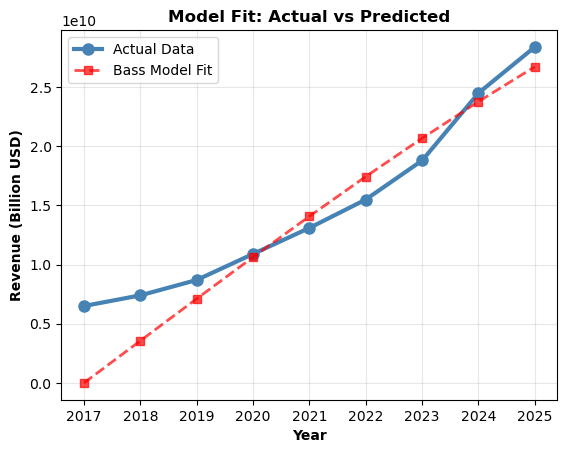

In [219]:
y_fitted = bass_cumulative(t_data, p_est, q_est, M_est)

plt.plot(data['Year'], y_data, 'o-', label='Actual Data', 
            linewidth=3, markersize=8, color='steelblue')
plt.plot(data['Year'], y_fitted, 's--', label='Bass Model Fit', 
            linewidth=2, markersize=6, alpha=0.7, color='red')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Revenue (Billion USD)', fontweight='bold')
plt.title('Model Fit: Actual vs Predicted', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

file_path_img2 = '/Users/arpinejanunts/Documents/Homework/HW1/img/actual_predicted_plot.png'

plt.savefig(file_path_img2, dpi=300, bbox_inches='tight')
plt.show()

# Forecast Generation

Generate forecasts for future periods using the estimated Bass Model

In [221]:
forecast_years = 3
last_year = data['Year'].max()
forecast_year_range = np.arange(last_year + 1, last_year + forecast_years + 1)

total_periods = len(data) + forecast_years
t_extended = np.arange(0, total_periods)
years_extended = np.arange(data['Year'].min(), last_year + forecast_years + 1)

# forecasted cumulative adoption
cumulative_forecast = bass_cumulative(t_extended, p_est, q_est, M_est)

# period-by-period adoption (new adopters per period)
period_adoption = bass_period_adoption(t_extended, p_est, q_est, M_est)

forecast_df = pd.DataFrame({
    'Year': years_extended,
    'Time_Period': t_extended,
    'Cumulative_Adoption': cumulative_forecast,
    'Period_Adoption': period_adoption,
    'Data_Type': ['Historical' if year <= last_year else 'Forecast' 
                  for year in years_extended]
})

print(f"Historical data: {data['Year'].min()} - {last_year}")
print(f"Forecast period: {last_year + 1} - {last_year + forecast_years}")
print(f"\nForecast summary (last 5 years):")
print(forecast_df.tail())

Historical data: 2017 - 2025
Forecast period: 2026 - 2028

Forecast summary (last 5 years):
    Year  Time_Period  Cumulative_Adoption  Period_Adoption   Data_Type
7   2024            7         2.378191e+10     3.026845e+09  Historical
8   2025            8         2.672896e+10     2.865203e+09  Historical
9   2026            9         2.950887e+10     2.693233e+09    Forecast
10  2027           10         3.211333e+10     2.514945e+09    Forecast
11  2028           11         3.453789e+10     2.334039e+09    Forecast


# Comprehensive Forecast Visualization

Detailed visualizations showing historical data, model fit, and forecasts

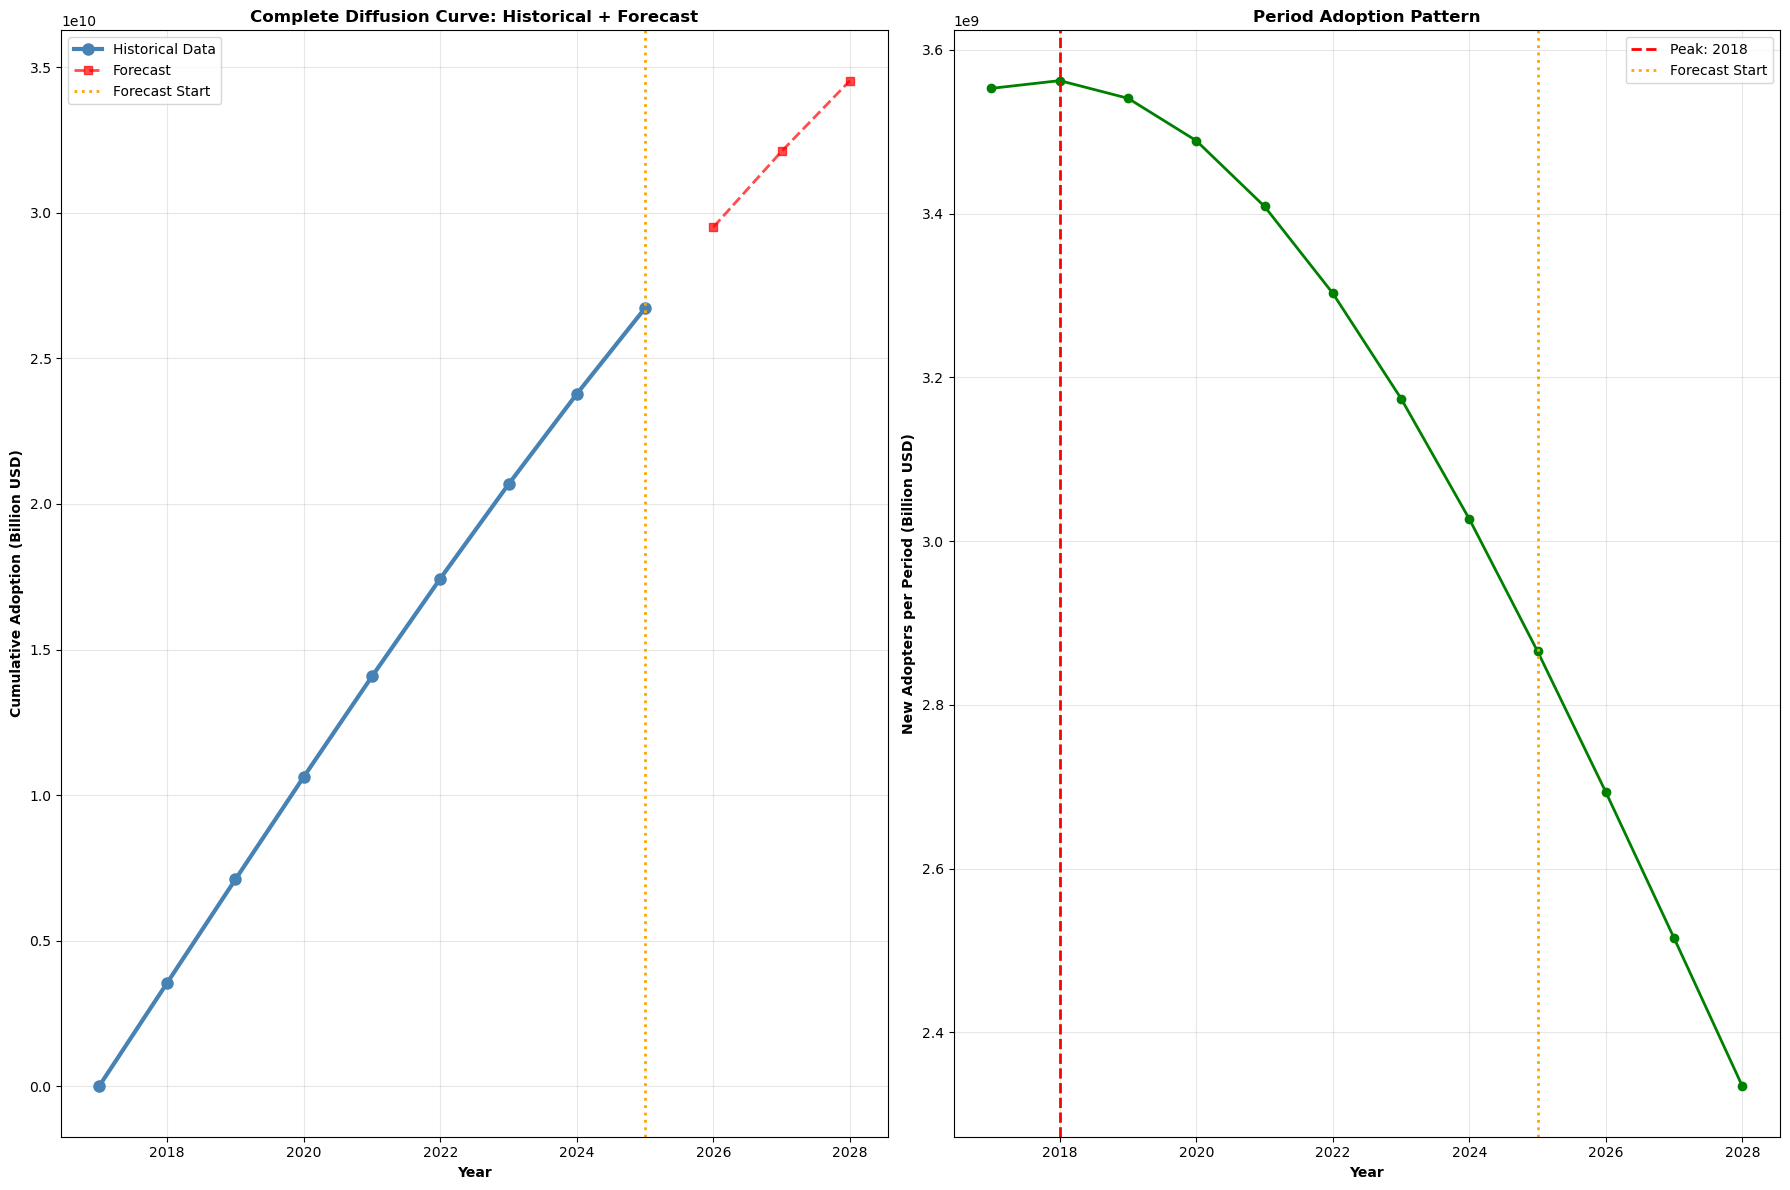

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

historical_mask = forecast_df['Data_Type'] == 'Historical'
forecast_mask = forecast_df['Data_Type'] == 'Forecast'

axes[0].plot(forecast_df[historical_mask]['Year'], 
              forecast_df[historical_mask]['Cumulative_Adoption'],
              'o-', label='Historical Data', linewidth=3, markersize=8, color='steelblue')
axes[0].plot(forecast_df[forecast_mask]['Year'], 
              forecast_df[forecast_mask]['Cumulative_Adoption'],
              's--', label='Forecast', linewidth=2, markersize=6, alpha=0.7, color='red')
axes[0].axvline(x=last_year, color='orange', linestyle=':', linewidth=2, label='Forecast Start')
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Cumulative Adoption (Billion USD)', fontweight='bold')
axes[0].set_title('Complete Diffusion Curve: Historical + Forecast', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(forecast_df['Year'], forecast_df['Period_Adoption'], 
               'o-', linewidth=2, markersize=6, color='green')
axes[1].axvline(x=peak_year, color='red', linestyle='--', 
                 label=f'Peak: {peak_year}', linewidth=2)
axes[1].axvline(x=last_year, color='orange', linestyle=':', 
                 linewidth=2, label='Forecast Start')
axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_ylabel('New Adopters per Period (Billion USD)', fontweight='bold')
axes[1].set_title('Period Adoption Pattern', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()

file_path_img3 = '/Users/arpinejanunts/Documents/Homework/HW1/img/Analysis.png'

plt.savefig(file_path_img3, dpi=300, bbox_inches='tight')

plt.show()
